# ResNet && CIFAR10/CIFAR100
We test ResNet classifier.
First init some basic environment.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

One time installation of needed lib from requirement.txt and creating dir 

In [2]:
!pip install -r requirements.txt
!mkdir data

    100% |████████████████████████████████| 61kB 70.0MB/s ta 0:00:01
    100% |████████████████████████████████| 10.4MB 98.3MB/s eta 0:00:01  27% |████████▊                       | 2.8MB 93.9MB/s eta 0:00:01   69% |██████████████████████▏         | 7.2MB 89.2MB/s eta 0:00:01
    100% |████████████████████████████████| 7.0MB 89.4MB/s ta 0:00:011�██████████████████▊          | 4.8MB 88.5MB/s eta 0:00:01
    100% |████████████████████████████████| 378kB 100.9MB/s ta 0:00:01
    100% |████████████████████████████████| 686kB 44.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 69.6MB/s ta 0:00:01
    100% |████████████████████████████████| 51kB 68.5MB/s ta 0:00:01
    100% |████████████████████████████████| 204kB 99.3MB/s eta 0:00:01
  Running setup.py bdist_wheel for torchnet ... done
  Stored in directory: /home/ma-user/.cache/pip/wheels/54/7e/85/0e5071d02c5d0cf37cfd9fd437b71a2281fb71b1f89197edc5
  Running setup.py bdist_wheel for visdom ... done
  Stored in directory: /ho

You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
mkdir: cannot create directory ‘data’: File exists


# resnet20/56/110 model with CIFAR10 / CIFAR100


In [3]:
import torch.optim as optim
import torch.nn as nn
import time
from tnt_solver_ import *
from models.resnet_ import resnet20, resnet56, resnet110
from dataset.dataset_dowloader_ import *

cifar10_dowloader()
cifar100_dowloader()
model = resnet20()
print(model)

Successfully download file cv-course-public/coding-1/cifar-10-python.tar.gz from OBS to local ./data/cifar-10-python.tar.gz
Successfully download file cv-course-public/coding-1/cifar-100-python.tar.gz from OBS to local ./data/cifar-100-python.tar.gz
_ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
  )
  (layer1): Sequential(
    (0): _BasicBlock(
      (conv_bn_relu1): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace)
      )
      (conv_bn2): Sequential(
        (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

# Start learning 

## TODO
+ Stohastic gradient decrease? May be adam?
+ lr?
+ epoch?

In [ ]:
# %%time
# import torch.optim as optim
# import torch.nn.functional as F
# opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
# loss_fn = F.cross_entropy

# lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
# history = main(model, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)

In [ ]:
plot_history(history)

# GREAT TODO
+ Test each modification 3 times for the average results
+ Solve some of todos above
+ Play with lr, epochs, STD
+ Graphics
+ Think about the best way to analyse all results
+ May be to play with VGG?
+ Why with classic startup options there is over learning after 90th epoch???

Control each model learning startup to re-define all weights. (maybe) 

# Pandas

In [ ]:
!pip3 install pandas

In [ ]:
import pandas as pd
import numpy as np

d = { "lrate" : [0.01, 0.001, 0.0001],
  "epochs": [10, 20, 30],
  "optimizer": ["Adam", "SGD", "Adadelta"]
}

# params = {
#     'lr': [0.01, 0.02],
#     'max_epochs': [10, 20],
# }
params = {
    'epoch': [10, 20],
}

In [ ]:
df = pd.DataFrame(d)
df

In [ ]:
def train_model(lrate, epochs, optimizer):
    print(lrate, epochs, optimizer)
    return 'GOVNO'

In [ ]:
models = []
for i, (lrate, epochs, optimizer) in df.iterrows():
    models.append(train_model(lrate, epochs, optimizer))
print(models)

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [ ]:
iris = datasets.load_iris()
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)

clf = GridSearchCV(main, params)
clf.fit(iris.data, iris.target)


In [ ]:
clf.cv_results_

In [4]:
import sys
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm
import torchnet as tnt
from torchnet.engine import Engine
from dataset.data_loader_ import CIFAR10Data
# from torchnet.logger import VisdomLogger, VisdomPlotLogger
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from models.resnet_ import resnet20, resnet56, resnet110
import numpy as np
import torchvision
from sklearn.model_selection import train_test_split
import torch.optim as optim
from config.config_ import mean, std
import torchvision.transforms as transforms

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


def plot_history(history):
    """
    plot loss and acc history.
    :param history: train returned history object
    """
    plt.plot(history['train_loss'])
    plt.plot(history['val_loss'])
    plt.xlabel('epoch')
    plt.ylabel('Loss value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history['train_acc'])
    plt.plot(history['val_acc'])
    plt.xlabel('epoch')
    plt.ylabel('acc value')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(history['train_lr'])
    plt.xlabel('epoch')
    plt.ylabel('Train LR')
    plt.show()


def main(model, opt, epoch, loss_fn=F.cross_entropy, lr_scheduler=None):
    """
    train model and test on test data
    :return:
    """
    
    torch.manual_seed(6666)
    torch.cuda.manual_seed(6666)
    if torch.cuda.is_available():
        device = torch.device('cuda:0')
    else:
        device = torch.device('cpu')
    model.to(device)
    
    train_transform = transforms.Compose([
        transforms.RandomCrop(size=(32, 32), padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])
    val_transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std)
    ])
    train_set = torchvision.datasets.cifar.CIFAR10('data/', train=True, download=True, transform=train_transform)
    val_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=val_transform)

    train_split=0.9
    num_train = len(train_set)
    indices = list(range(num_train))
    split = int(num_train * train_split)
    train_idx, val_idx = indices[:split], indices[split:]
    train_dataset = torch.utils.data.Subset(train_set, train_idx)
    print(type(train_dataset))
    print(type(train_dataset.dataset))
    print(type(train_dataset.dataset[0]))
    print(train_dataset.dataset[0])
    print(type(train_dataset.dataset[0][0]))
    print(type(train_dataset.dataset[0][1]))
    
    val_dataset = torch.utils.data.Subset(val_set, val_idx)

    X = (np.swapaxes(train_set.train_data, 1, 3)/255).astype('float32')
    y = np.array(val_set.train_labels).astype('int64')
    print(X.shape)
    print(y.shape)
    print(X[0])
    print(y[0])
    
#     net1 = ResnetClassifier(1)
#     net1.fit(X,y)
    
    net = ResnetClassifier()
    
    tuned_params = {"epoches" : [1,3]}

    gs = GridSearchCV(estimator=net, param_grid=tuned_params, refit=False, cv=3, scoring='accuracy')
#     gs.fit(train_set, val_set)
    gs.fit(X, y)
#     gs.fit(train_dataset, val_dataset)
    best_score = gs.best_score_
    best_params = gs.best_params_
    
class ResnetClassifier(BaseEstimator, ClassifierMixin):
    """An example of classifier"""

    def __init__(self, epoches=0):
        """
        Called when initializing the classifier
        """
        self.epoches = epoches

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.

        Note: assert is not a good choice here and you should rather
        use try/except blog with exceptions. This is just for short syntax.
        """
#         train_split=0.9

#         num_train = len(X)
#         indices = list(range(num_train))
#         split = int(num_train * train_split)
#         train_idx, val_idx = indices[:split], indices[split:]
#         train_dataset = torch.utils.data.Subset(X, train_idx)
#         val_dataset = torch.utils.data.Subset(y, val_idx)
#         test_dataset = val_dataset

        print(X.shape[0])
        a = []
        for i in range(X.shape[0]):
            b = (torch.from_numpy(X[i]),y[i])
            a.append(b)
        print(a)
#         print(type(X.dataset[0]))
#         print(X.dataset[0])
#         print(X.dataset[1])
        train_loader = torch.utils.data.DataLoader(
            a, batch_size=128,
            num_workers=2, shuffle=True)
#         print(type(train_loader.dataset))
#         print(train_loader.dataset[0].shape)
#         print(train_loader.dataset[1].shape)
        
        val_loader = torch.utils.data.DataLoader(
            a, batch_size=128,
            num_workers=2, shuffle=False
        )
            
        test_loader = torch.utils.data.DataLoader(
            a, batch_size=128,
            num_workers=2, shuffle=False
        )
              
#         print(train_loader.dataset.size())
#         print(val_loader.dataset.size())
        
        num_classes = 10
        lr_scheduler = None
        
        self.model = resnet20()

        self.loss_fn = F.cross_entropy

        torch.manual_seed(6666)
        torch.cuda.manual_seed(6666)
        if torch.cuda.is_available():
            device = torch.device('cuda:0')
        else:
            device = torch.device('cpu')
        self.model.to(device)
        history = {'train_loss': [], 'train_acc': [], 'train_lr': [], 'val_loss': [], 'val_acc': []}
        
        opt = optim.SGD(self.model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)

        meter_loss = tnt.meter.AverageValueMeter()
        self.classacc = tnt.meter.ClassErrorMeter(accuracy=True)
        confusion_meter = tnt.meter.ConfusionMeter(num_classes, normalized=True)

        def reset_meters():
            self.classacc.reset()
            meter_loss.reset()

        def on_forward(state):
            self.classacc.add(state['output'].detach(), state['sample'][1])
            meter_loss.add(state['loss'].item())
            confusion_meter.add(state['output'].detach(), state['sample'][1])
            if state['train']:
                state['iterator'].set_postfix_str(s="loss:{:.4f}, acc:{:.4f}%".format(meter_loss.value()[0], self.classacc.value()[0]))
        def on_start_epoch(state):
            current_lr = opt.param_groups[0]['lr']
            print('Epoch: %d/%d, lr:%.2e' % (state['epoch']+1, state['maxepoch'], current_lr))
            reset_meters()
            self.model.train(True)
            state['iterator'] = tqdm(state['iterator'], file=sys.stdout)
            history['train_lr'].append(current_lr)

        def on_end_epoch(state):
            history['train_loss'].append(meter_loss.value()[0])
            history['train_acc'].append(self.classacc.value()[0])

            # do validation at the end of each epoch
            reset_meters()
            self.model.train(False)
            engine.test(h, val_loader)
            print('Val loss: %.4f, accuracy: %.2f%%' % (meter_loss.value()[0], self.classacc.value()[0]))

            if lr_scheduler:
                if isinstance(lr_scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
                    lr_scheduler.step(self.classacc.value()[0], epoch=(epoch+1))
                else:
                    lr_scheduler.step()

            history['val_loss'].append(meter_loss.value()[0])
            history['val_acc'].append(self.classacc.value()[0])
            
        def h(sample):
            x = sample[0].to(device)
#             print(type(sample))
#             print(sample.shape)
#             print(type(x))
#             print(x.shape)
            y = sample[1].to(device)
#             print(type(y))
#             print(y.shape)
            o = self.model(x.cuda())
            return self.loss_fn(o, y), o

        engine = Engine()
        engine.hooks['on_forward'] = on_forward
        engine.hooks['on_start_epoch'] = on_start_epoch
        engine.hooks['on_end_epoch'] = on_end_epoch
        engine.train(h, train_loader, self.epoches, opt)

        # test
        self.model.train(False)
        engine.test(h, test_loader)
        print('Test loss: %.4f, accuracy: %.2f%%' % (meter_loss.value()[0], self.classacc.value()[0]))
        plot_history(history)
        return self        
        
    def predict(self, X=None, y=None):
        print(X)
        print(type(X))
        print(y)
        print(type(y))
        print(torch.from_numpy(X).shape)
#         o = self.model(torch.from_numpy(X))
        return([])

    def score(self, X=None, y=None):
        # counts number of values bigger than mean
        return self.classacc.value()[0]



Files already downloaded and verified
Files already downloaded and verified
<class 'torch.utils.data.dataset.Subset'>
<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'tuple'>
(tensor([[[-1.7358, -1.2120, -0.6722,  ..., -0.0849, -0.2595, -1.9898],
         [-1.3866, -0.6087, -0.3071,  ..., -0.0690, -0.4976, -1.9898],
         [-1.0532, -0.3706,  0.0263,  ..., -0.7992, -0.9262, -1.9898],
         ...,
         [ 0.6771,  0.8518,  0.9946,  ...,  0.4073, -0.0372, -1.9898],
         [-1.9898, -1.9898, -1.9898,  ..., -1.9898, -1.9898, -1.9898],
         [-1.9898, -1.9898, -1.9898,  ..., -1.9898, -1.9898, -1.9898]],

        [[-1.8674, -1.5452, -1.1748,  ..., -0.6272, -0.8044, -1.9801],
         [-1.6580, -1.1104, -0.9654,  ..., -0.6111, -0.9815, -1.9801],
         [-1.4647, -0.9332, -0.7077,  ..., -1.2231, -1.3036, -1.9801],
         ...,
         [ 0.0976,  0.3069,  0.4197,  ..., -0.0796, -0.4983, -1.9801],
         [-1.9801, -1.9801, -1.9801,  ..., -1.9801, -1.9801, -1.9801],
         

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100%|██████████| 261/261 [00:06<00:00, 38.00it/s, loss:1.6692, acc:36.9784%]
Val loss: 1.5577, accuracy: 41.33%
Test loss: 1.5577, accuracy: 41.33%


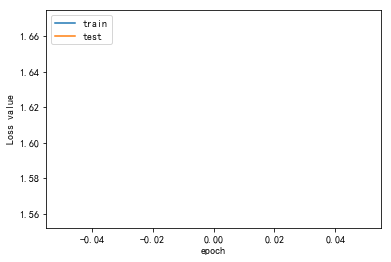

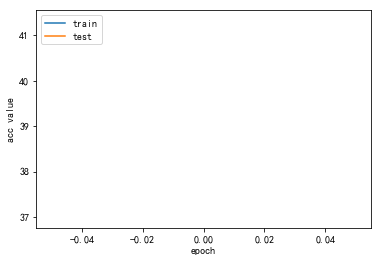

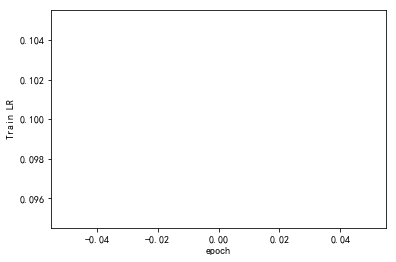

[[[[0.23137255 0.0627451  0.09803922 ... 0.8156863  0.7058824
    0.69411767]
   [0.16862746 0.         0.0627451  ... 0.7882353  0.6784314
    0.65882355]
   [0.19607843 0.07058824 0.19215687 ... 0.7764706  0.7294118
    0.7019608 ]
   ...
   [0.61960787 0.48235294 0.4627451  ... 0.627451   0.72156864
    0.84705883]
   [0.59607846 0.46666667 0.47058824 ... 0.21960784 0.38039216
    0.5921569 ]
   [0.5803922  0.47843137 0.42745098 ... 0.20784314 0.3254902
    0.48235294]]

  [[0.24313726 0.07843138 0.09411765 ... 0.6666667  0.54509807
    0.5647059 ]
   [0.18039216 0.         0.02745098 ... 0.6        0.48235294
    0.5058824 ]
   [0.1882353  0.03137255 0.10588235 ... 0.6313726  0.5647059
    0.5568628 ]
   ...
   [0.5176471  0.34509805 0.32941177 ... 0.52156866 0.5803922
    0.72156864]
   [0.49019608 0.3254902  0.32941177 ... 0.12156863 0.24313726
    0.4627451 ]
   [0.4862745  0.34117648 0.28627452 ... 0.13333334 0.20784314
    0.36078432]]

  [[0.24705882 0.07843138 0.08235294 ...

ValueError: Found input variables with inconsistent numbers of samples: [16667, 0]

In [5]:
%%time
import torch.optim as optim
import torch.nn.functional as F
opt = optim.SGD(model.parameters(), lr=1e-1, momentum=0.9, weight_decay=1e-4, nesterov=False)
loss_fn = F.cross_entropy

lr_scheduler= optim.lr_scheduler.MultiStepLR(opt, milestones=[91, 137], gamma=0.1)
history = main(model, opt, epoch=180, loss_fn=loss_fn, lr_scheduler=lr_scheduler)